## Множественная линейная регрессия на чистых данных

## Лабораторная_работа_№3_Машинное_обучение_ДПИ22_1с_Берникова_Валерия

Задания для самостоятельного выполнения
1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.
2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.
3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.
4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.
5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.
6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [25]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv", header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv", header=None)

In [26]:
x.shape, y.shape

((387, 5), (387, 1))

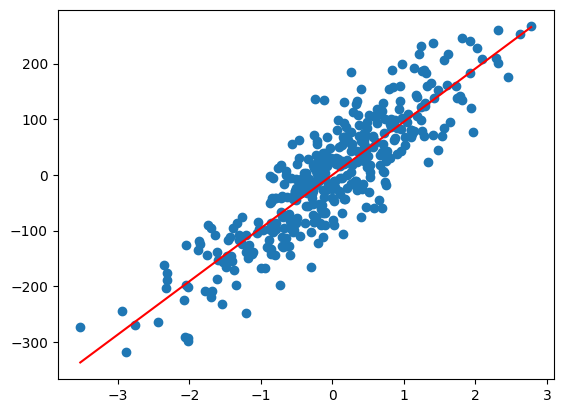

In [27]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.coef_
binary.predict(x[[1]])
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

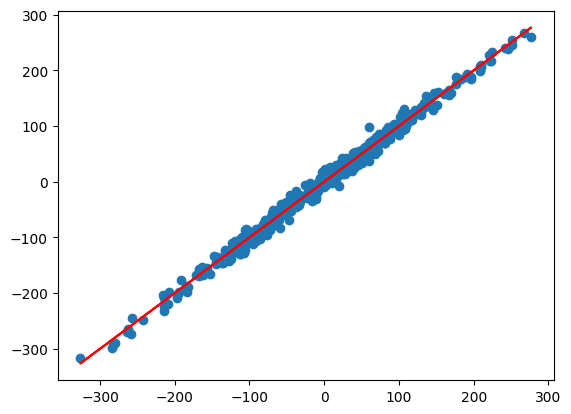

In [28]:
r2_score = binary.score(x[[1]], y)
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

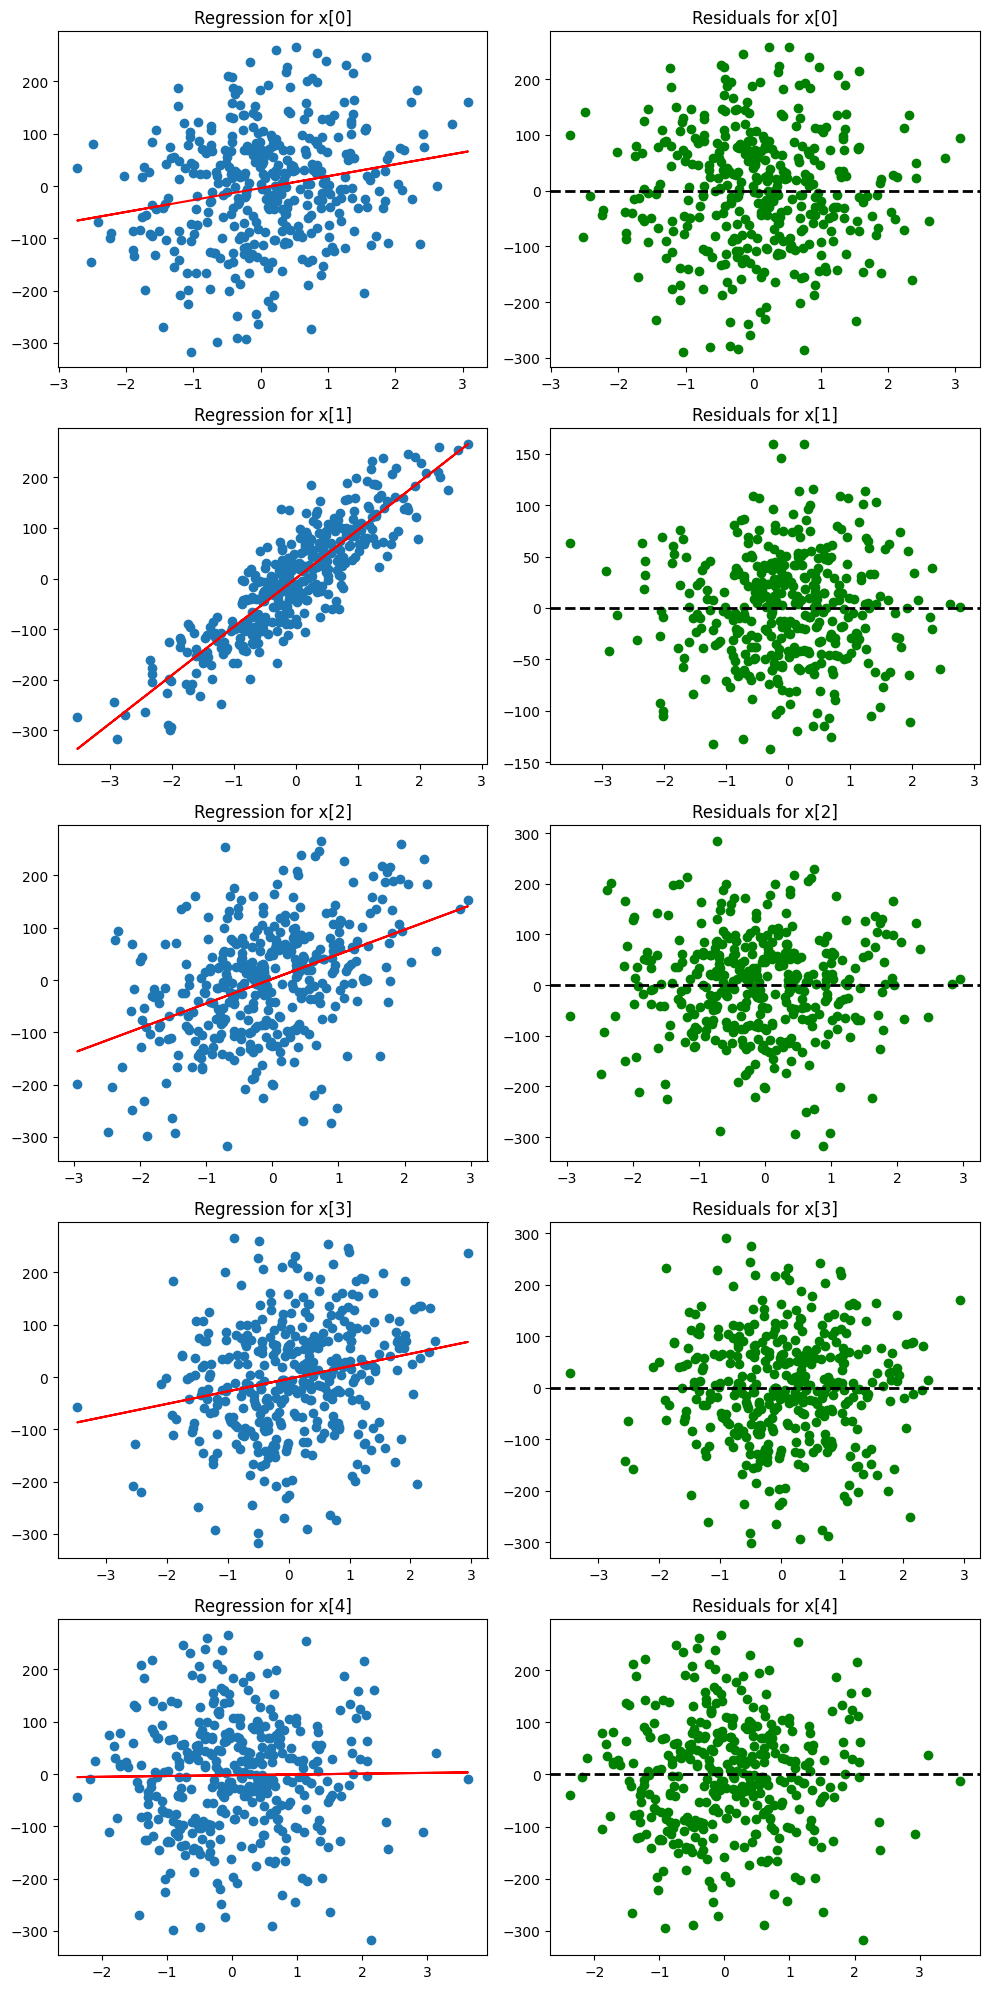

In [29]:
# Построение парных регрессий для каждого атрибута
fig, axs = plt.subplots(x.shape[1], 2, figsize=(10, 20))

for i in range(x.shape[1]):
    # Построение парной регрессии для каждого атрибута и целевой переменной
    model = LinearRegression()
    model.fit(x[[i]], y)
    
    # График рассеяния и регрессионная прямая
    axs[i, 0].scatter(x[i], y)
    axs[i, 0].plot(x[i], model.predict(x[[i]]), color='red')
    axs[i, 0].set_title(f'Regression for x[{i}]')

    # Визуализация остатков
    axs[i, 1].scatter(x[i], y - model.predict(x[[i]]), color='green')
    axs[i, 1].axhline(y=0, color='black', linewidth=2, linestyle='--')
    axs[i, 1].set_title(f'Residuals for x[{i}]')
plt.tight_layout()
plt.show()

2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

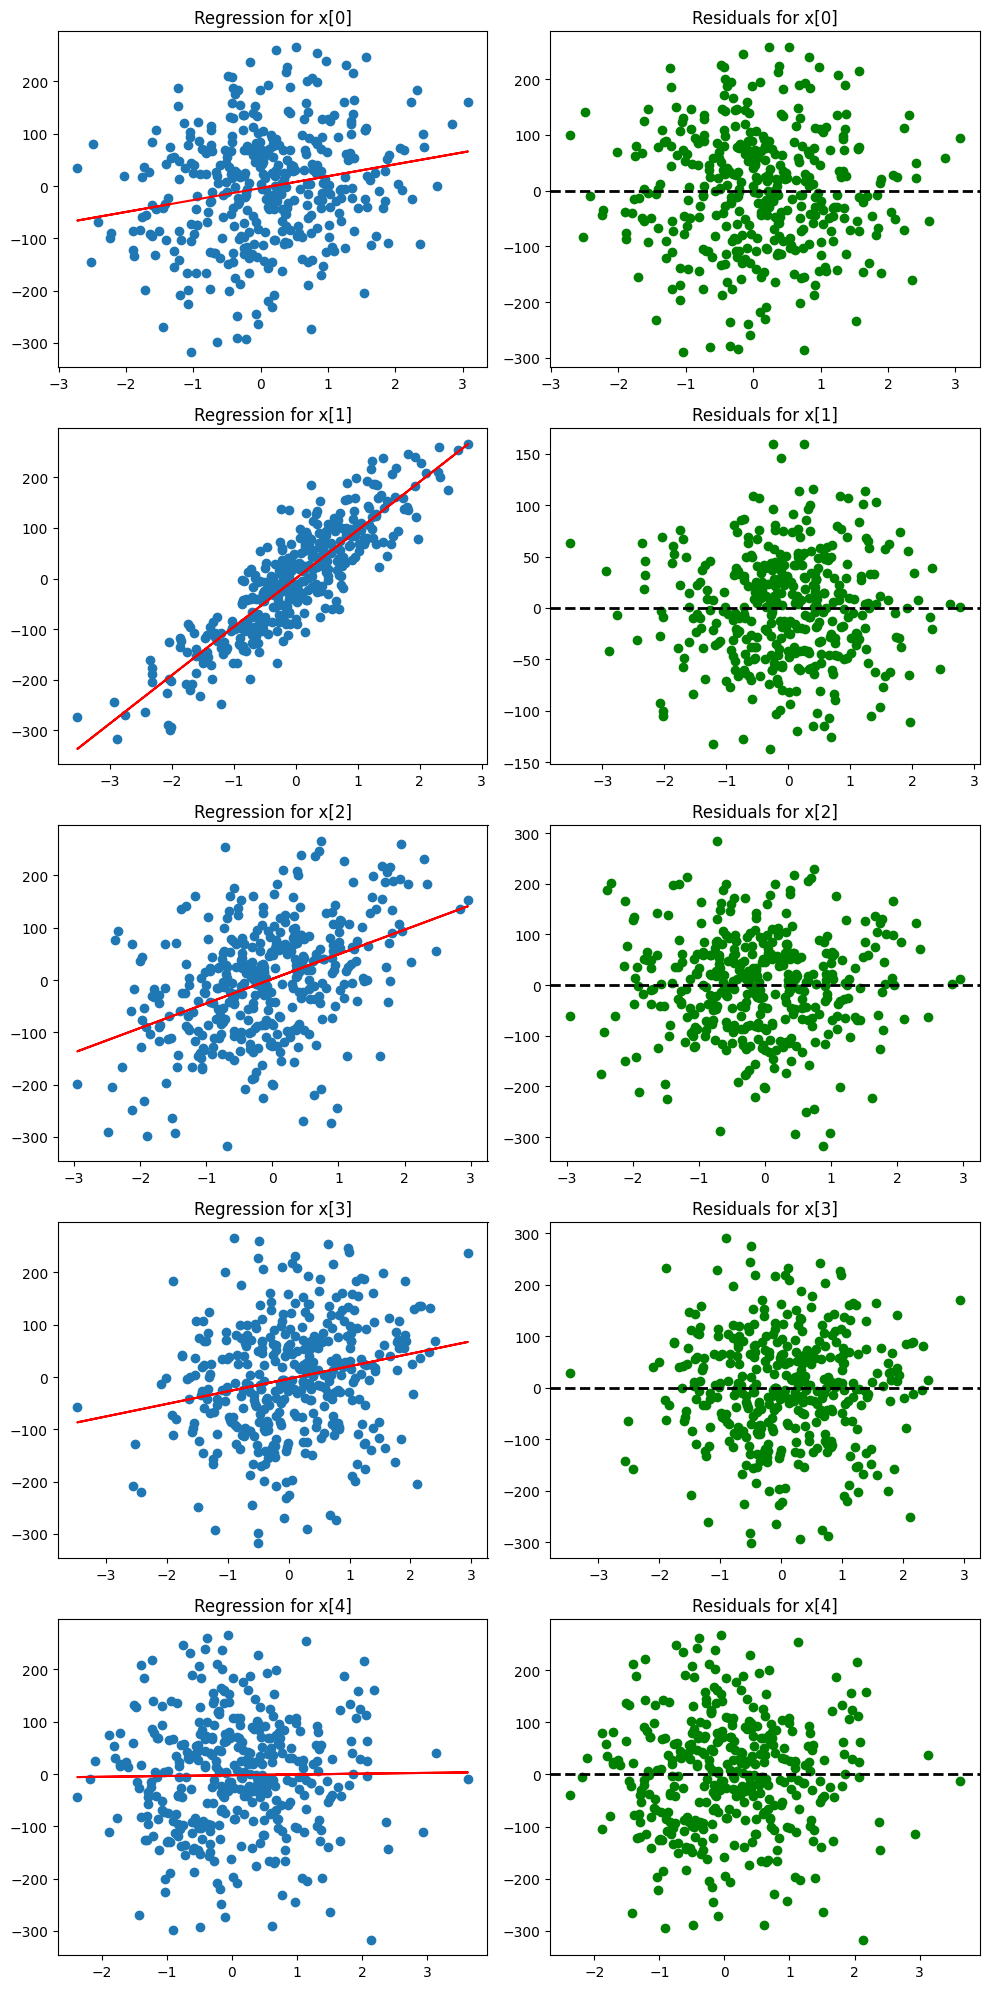

In [30]:
# Построение регрессий для всех атрибутов
fig, axs = plt.subplots(x.shape[1], 2, figsize=(10, 20))

for i in range(x.shape[1]):
    # Построение регрессии для каждого атрибута и целевой переменной
    model = LinearRegression()
    model.fit(x.iloc[:, i:i+1], y)
    
    # График рассеяния и регрессионная прямая
    axs[i, 0].scatter(x.iloc[:, i], y)
    axs[i, 0].plot(x.iloc[:, i], model.predict(x.iloc[:, i:i+1]), color='red')
    axs[i, 0].set_title(f'Regression for x[{i}]')

    # Визуализация остатков
    axs[i, 1].scatter(x.iloc[:, i], y - model.predict(x.iloc[:, i:i+1]), color='green')
    axs[i, 1].axhline(y=0, color='black', linewidth=2, linestyle='--')
    axs[i, 1].set_title(f'Residuals for x[{i}]')

plt.tight_layout()
plt.show()

3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

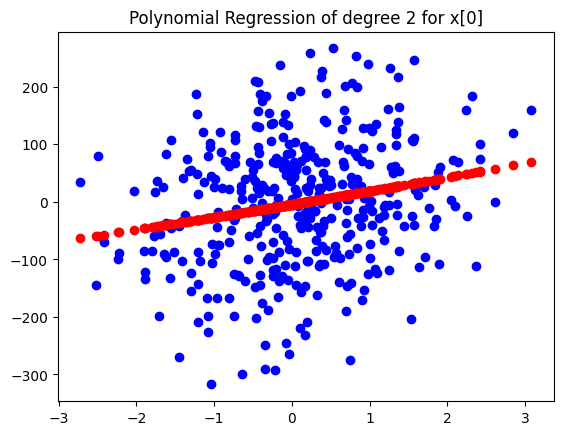

R-squared value for Polynomial Regression of degree 2 for x[0]: 0.04367170367915507


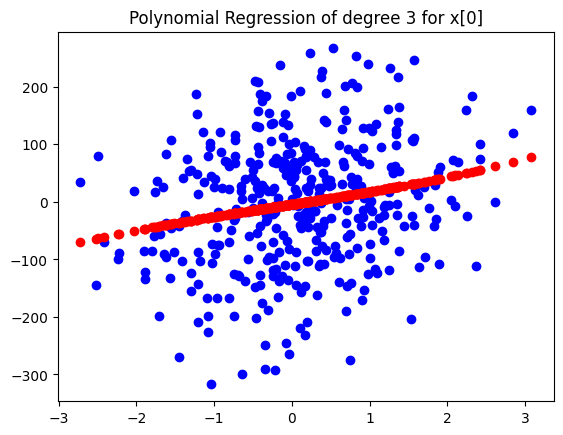

R-squared value for Polynomial Regression of degree 3 for x[0]: 0.04376506816920167


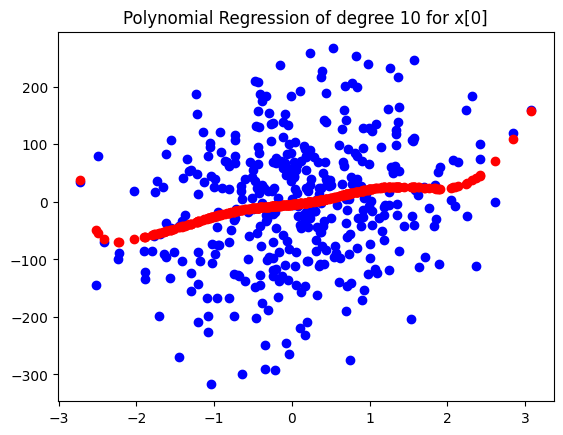

R-squared value for Polynomial Regression of degree 10 for x[0]: 0.05035596325168745


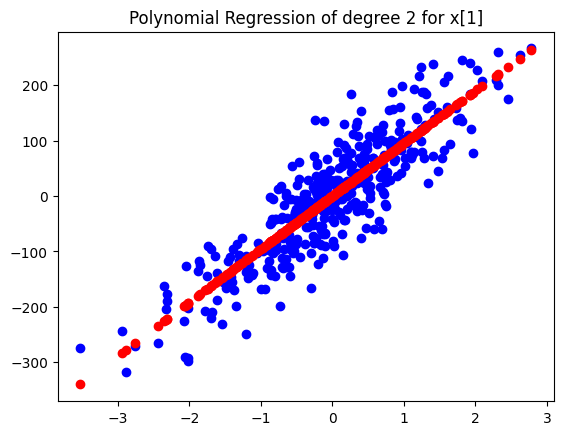

R-squared value for Polynomial Regression of degree 2 for x[1]: 0.7699942588883133


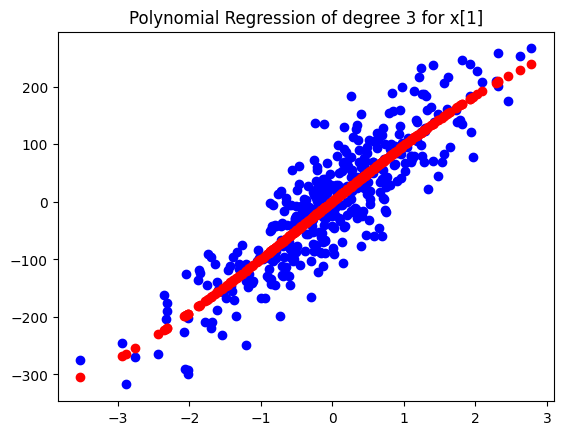

R-squared value for Polynomial Regression of degree 3 for x[1]: 0.7711184109235001


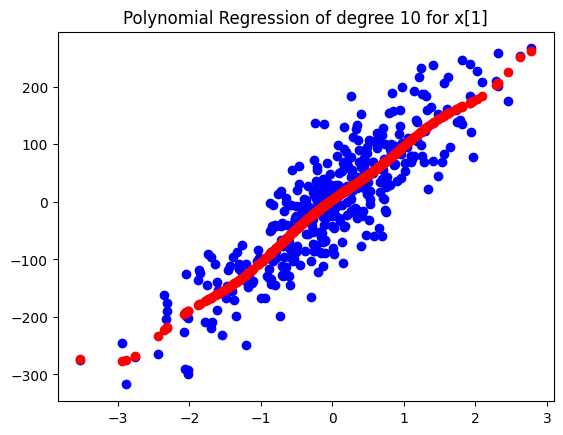

R-squared value for Polynomial Regression of degree 10 for x[1]: 0.7726769307411921


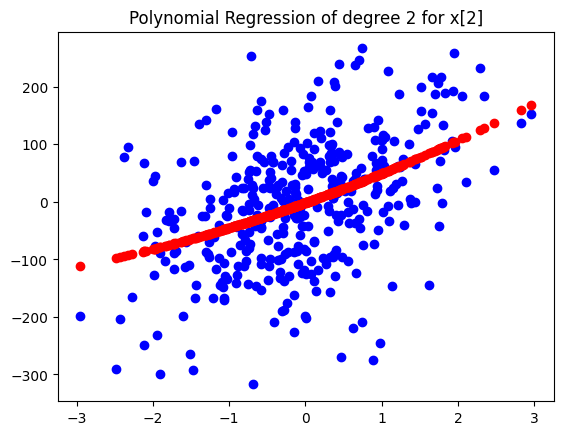

R-squared value for Polynomial Regression of degree 2 for x[2]: 0.19000787278473819


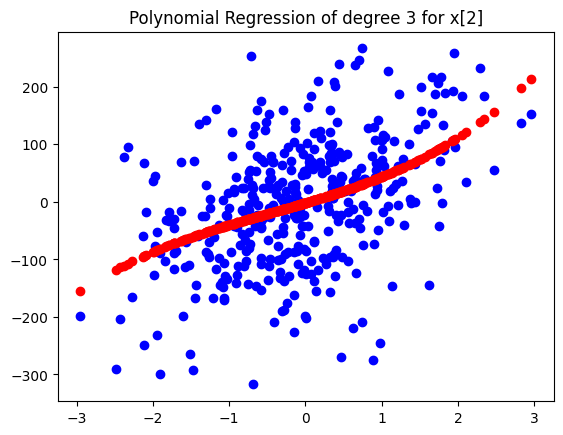

R-squared value for Polynomial Regression of degree 3 for x[2]: 0.19280163734543854


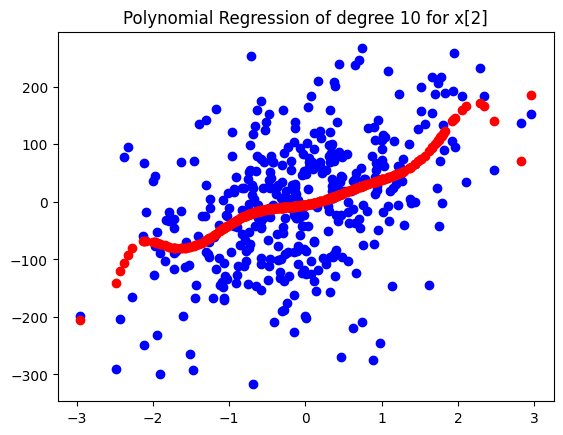

R-squared value for Polynomial Regression of degree 10 for x[2]: 0.20440944561264418


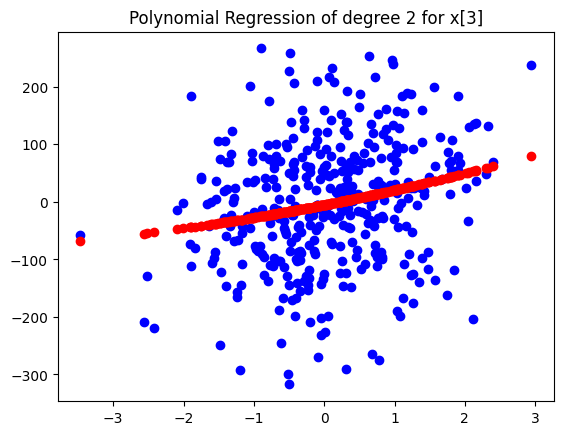

R-squared value for Polynomial Regression of degree 2 for x[3]: 0.04794250960519941


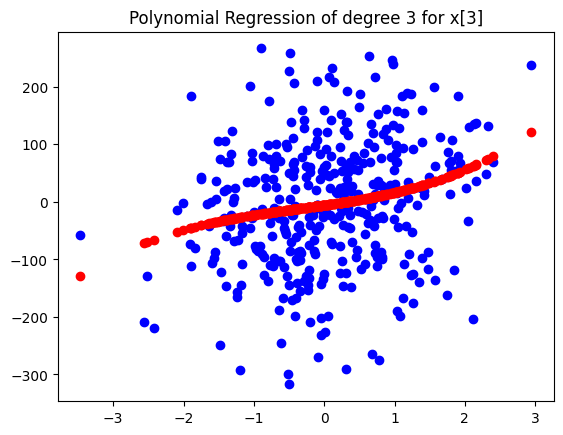

R-squared value for Polynomial Regression of degree 3 for x[3]: 0.05031163217811918


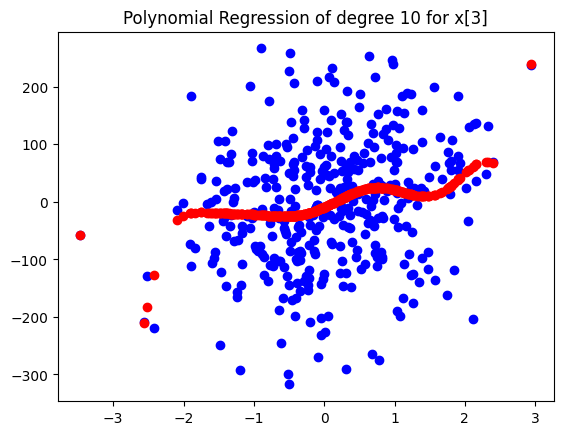

R-squared value for Polynomial Regression of degree 10 for x[3]: 0.07266746559268988


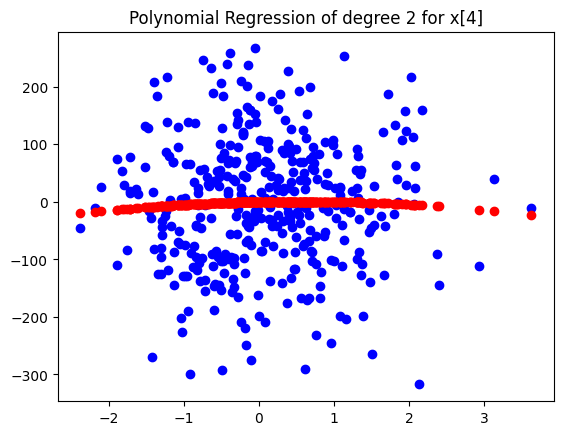

R-squared value for Polynomial Regression of degree 2 for x[4]: 0.0010490365524417067


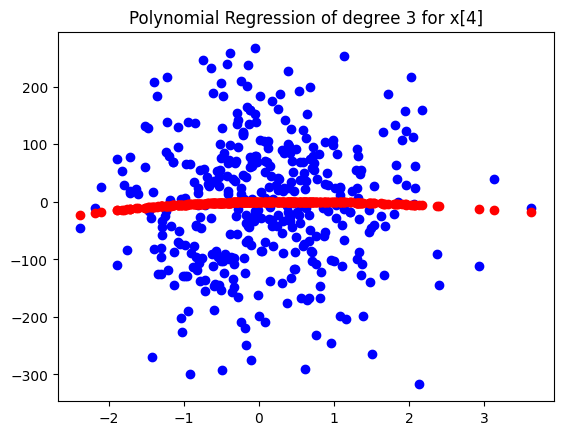

R-squared value for Polynomial Regression of degree 3 for x[4]: 0.0010646025332345932


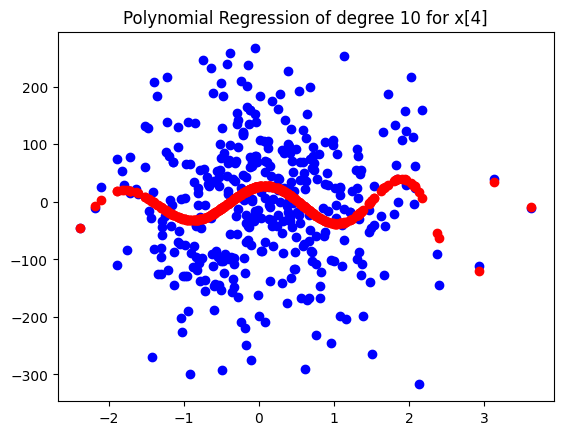

R-squared value for Polynomial Regression of degree 10 for x[4]: 0.0450526417134679


In [33]:
orders = [2, 3, 10]

for i in range(x.shape[1]):
    current_x = x.iloc[:, i:i+1]
    for order in orders:
        poly = PolynomialFeatures(degree=order)
        x_poly = poly.fit_transform(current_x)
        model = LinearRegression()
        model.fit(x_poly, y)
        y_pred = model.predict(x_poly)

        plt.scatter(current_x, y, color='blue')
        plt.scatter(current_x, y_pred, color='red')
        plt.title(f'Polynomial Regression of degree {order} for x[{i}]')
        plt.show()

        r2 = r2_score(y, y_pred)
        print(f'R-squared value for Polynomial Regression of degree {order} for x[{i}]: {r2}')

4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.